## 12601539

## EX-3- LINEAR REGESSION 



In [100]:
import pandas as pd 
import numpy as np

data = pd.read_csv(r"C:\Users\sastra\Downloads\126015039\dataset\bangalore_house_prices.csv", sep = ',')
data.head()


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type,Availability,location
0,3,2.0,150.0,1672.0,3,8971.291866,Super built-up Area,Ready To Move,Whitefield
1,3,3.0,149.0,1750.0,3,8514.285714,Built-up Area,Ready To Move,Whitefield
2,3,2.0,150.0,1750.0,3,8571.428571,Super built-up Area,Ready To Move,Whitefield
3,2,2.0,40.0,1250.0,2,3200.000000,Super built-up Area,Ready To Move,Whitefield
4,2,2.0,83.0,1200.0,2,6916.666667,Plot Area,Ready To Move,Whitefield


In [2]:
df =  data.copy()
df.head()


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type,Availability,location
0,3,2.0,150.0,1672.0,3,8971.291866,Super built-up Area,Ready To Move,Whitefield
1,3,3.0,149.0,1750.0,3,8514.285714,Built-up Area,Ready To Move,Whitefield
2,3,2.0,150.0,1750.0,3,8571.428571,Super built-up Area,Ready To Move,Whitefield
3,2,2.0,40.0,1250.0,2,3200.000000,Super built-up Area,Ready To Move,Whitefield
4,2,2.0,83.0,1200.0,2,6916.666667,Plot Area,Ready To Move,Whitefield


In [3]:
df.shape

(7120, 9)

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [9]:
df.isnull().sum()


bath              0
balcony           0
price             0
total_sqft_int    0
bhk               0
price_per_sqft    0
area_type         0
Availability      0
location          0
dtype: int64

In [10]:
df1 = df[['bath','balcony','total_sqft_int','bhk']]
df1.head()

,bath,balcony,total_sqft_int,bhk
0,3,2.0,1672.0,3
1,3,3.0,1750.0,3
2,3,2.0,1750.0,3
3,2,2.0,1250.0,2
4,2,2.0,1200.0,2


In [11]:
print("SUMMARY OF THE DATASET")
df1.info()

SUMMARY OF THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            7120 non-null   int64  
 1   balcony         7120 non-null   float64
 2   total_sqft_int  7120 non-null   float64
 3   bhk             7120 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 222.6 KB


In [12]:
df1.describe()

,bath,balcony,total_sqft_int,bhk
count,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,1479.729806,2.465169
std,0.876822,0.770583,913.779769,0.841520
min,1.000000,0.000000,350.000000,1.000000
25%,2.000000,1.000000,1100.000000,2.000000
50%,2.000000,2.000000,1255.000000,2.000000
75%,3.000000,2.000000,1640.250000,3.000000
max,9.000000,3.000000,30400.000000,9.000000


In [13]:
df1.corr()

,bath,balcony,total_sqft_int,bhk
bath,1.000000,0.283192,0.653435,0.882461
balcony,0.283192,1.000000,0.200648,0.269511
total_sqft_int,0.653435,0.200648,1.000000,0.647485
bhk,0.882461,0.269511,0.647485,1.000000


In [14]:
print("THE SKEW")
print(df1.skew())


THE SKEW
bath               1.796257
balcony            0.066610
total_sqft_int    11.464497
bhk                1.605694
dtype: float64


# SCATTER PLOT 

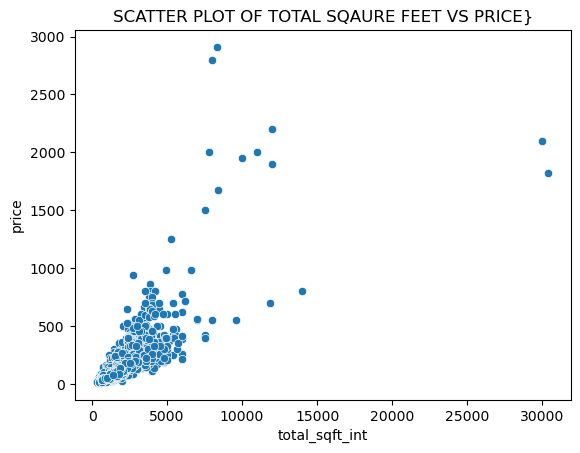

In [104]:
sns.scatterplot(x='total_sqft_int', y ='price', data = df)
plt.title('SCATTER PLOT OF TOTAL SQAURE FEET VS PRICE}')
plt.show()

# PAIR PLOT 

C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

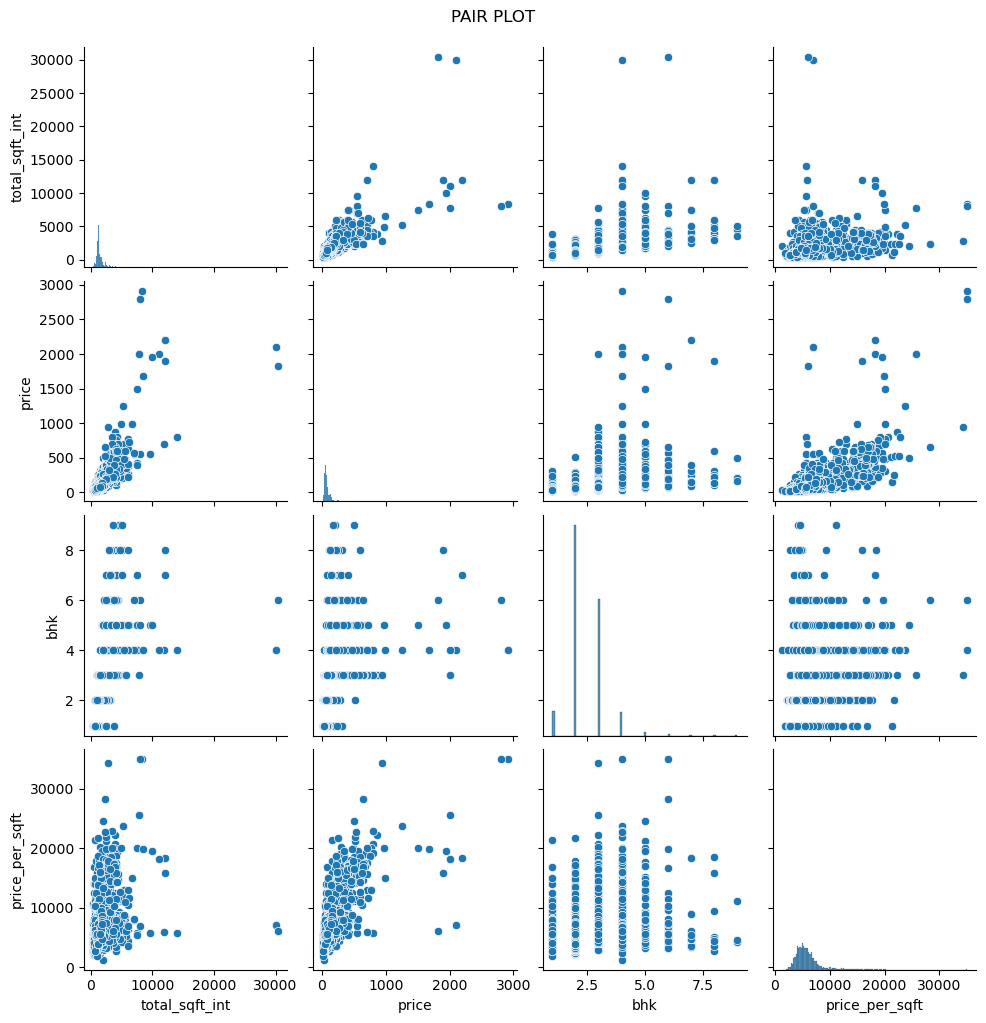

In [106]:


selected_colums = [ 'total_sqft_int','price','bhk','price_per_sqft']
sns.pairplot(df[selected_colums])

plt.suptitle("PAIR PLOT", y = 1.02)
plt.show()

# BOXPLOT 

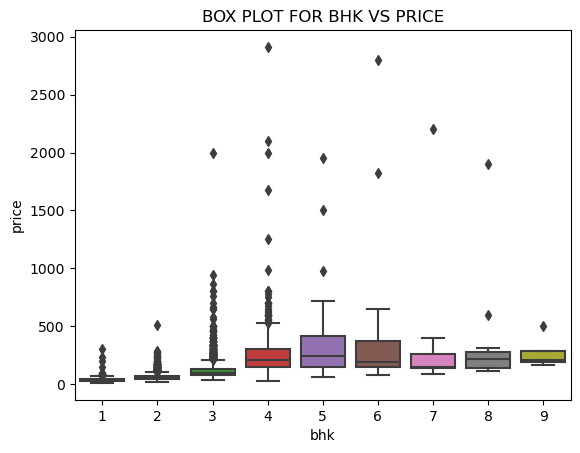

In [108]:
sns.boxplot(x='bhk', y='price',data = df)
plt.title("BOX PLOT FOR BHK VS PRICE")
plt.show()

# COUNT PLOT 

In [110]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


## LINEAR REGRESSION MODEL

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.DataFrame({
    'SquareFootage': [1000, 1200, 1500, 1800, 2200, 1350, 2000, 1750],
    'Price': [100000, 150000, 200000, 250000, 300000, 175000, 225000, 210000]
})


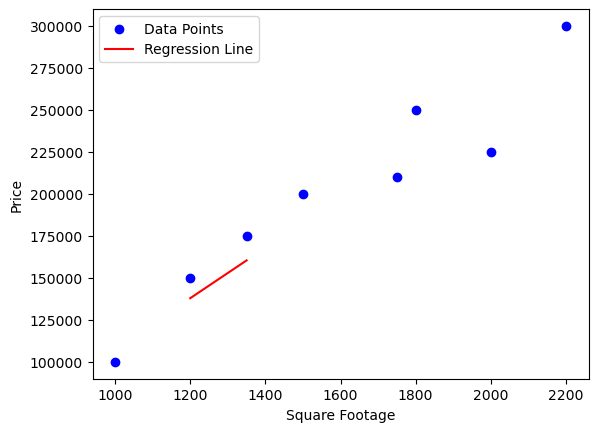

R-squared: -0.15


In [54]:
X = data[['SquareFootage']]  # Independent variable
y = data['Price']             # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, predictions, color='red', label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared:.2f}')


R-squared: 0.90
Mean Squared Error: 1082.90


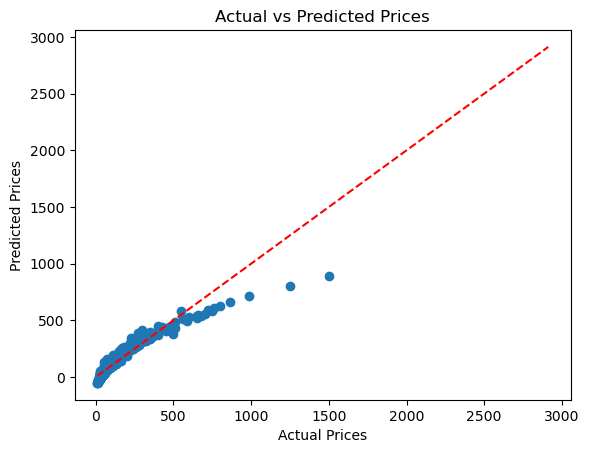

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv(r"C:\Users\sastra\Downloads\126015039\dataset\bangalore_house_prices.csv", sep = ',')
data.head()
#
# Explore the data
#print(data.head())
#print(data.isnull().sum())
# Prepare data

X = data[['total_sqft_int','bhk','price_per_sqft']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'R-squared: {r_squared:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

# Visualize results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.show()


In [98]:
r2_accuracy = r2_score(y_test, predictions)
print("The strength of the model is ",round(r2_accuracy, 2))

The strength of the model is  0.9


In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 17.946533030277674
Mean Squared Error: 1082.8989937549497
Root Mean Squared Error: 32.90743067689955


## LASSO REGRESSION 

In [56]:

lasso = Lasso()

In [61]:
lasso.fit(X_train,y_train)


Lasso()

In [64]:
x_pred_lasso_test = lasso.predict(X_test)
x_pred_lasso_test

array([ 32.14551427,  56.83436469,  66.47236338, ...,  51.01221015,
       -16.12571548,  36.36879128])

In [116]:
print("THE LASSO ACCURACY :")

r2_score(y_test,x_pred_lasso_test)


THE LASSO ACCURACY :


0.9039840503418226

# RIDGE REGRESSION

In [115]:

ridge = Ridge()
ridge.fit(X_train,y_train)


Ridge()

In [92]:
x_pred_ridge_test = ridge.predict(X_test)
x_pred_ridge_test

array([ 32.67822776,  57.516959  ,  67.17453997, ...,  51.60192166,
       -16.08415571,  36.86017274])

In [118]:
print("THE RIDGE TEST ACCURACY IS :")
r2_score(y_test,x_pred_ridge_test)

THE RIDGE TEST ACCURACY IS :


0.9046157739347889

# Polynomial regression


In [93]:
degree = 2  

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_train1 = model.fit(X_train, y_train)

In [94]:
pred2 = model_train1.predict(X_test)
pred2

array([47.        , 60.        , 65.        , ..., 56.5       ,
       26.00000001, 49.        ])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

In [121]:
r2_accuracy = r2_score(y_test, pred2)
print("The strength of the model is ",round(r2_accuracy, 2))

The strength of the model is  1.0


# Saving the model 